In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.preprocessing import FunctionTransformer,PowerTransformer,QuantileTransformer

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import SMOTE
from collections import Counter

In [20]:
psd_all_bands  =  pd.read_csv("psd_combined_dataset.csv")

In [21]:
original_df = psd_all_bands 
df =psd_all_bands 
df.shape

(2625, 71)

**Applying the Box-cox transformation**

In [22]:
boxcox = PowerTransformer(method='box-cox')
df_boxcox = boxcox.fit_transform(df.drop("Class",axis=1))
df_boxcox = pd.DataFrame(df_boxcox, columns=df.drop("Class",axis=1).columns)
df_boxcox.describe()

,AF3_delta,AF3_theta,AF3_alpha,AF3_beta,AF3_gamma,F7_delta,F7_theta,F7_alpha,F7_beta,F7_gamma,...,F8_delta,F8_theta,F8_alpha,F8_beta,F8_gamma,AF4_delta,AF4_theta,AF4_alpha,AF4_beta,AF4_gamma
count,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,...,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03
mean,1.840644e-16,5.657274e-16,-1.172057e-15,-4.209120e-16,8.661854e-17,1.400784e-16,2.436147e-17,2.923376e-16,-2.436147e-17,2.165464e-17,...,-1.028595e-16,2.436147e-17,-1.894781e-16,9.473903e-17,-2.368476e-17,-2.273737e-16,2.057190e-16,1.975986e-16,1.488756e-17,6.496391e-17
std,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00,...,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00
min,-3.406542e+00,-3.727900e+00,-3.099601e+00,-3.059997e+00,-3.043769e+00,-3.438253e+00,-4.364010e+00,-3.891235e+00,-3.053107e+00,-3.315846e+00,...,-3.373206e+00,-4.053761e+00,-4.678524e+00,-3.743101e+00,-4.727792e+00,-4.427390e+00,-3.243398e+00,-3.244274e+00,-3.008474e+00,-3.411612e+00
25%,-6.595814e-01,-6.416836e-01,-6.763414e-01,-7.288988e-01,-6.889021e-01,-7.023949e-01,-6.302673e-01,-6.543481e-01,-6.622451e-01,-6.647150e-01,...,-6.974291e-01,-6.429752e-01,-6.367734e-01,-6.083927e-01,-6.003533e-01,-6.965811e-01,-6.291397e-01,-7.170793e-01,-6.333554e-01,-6.664259e-01
50%,-6.913818e-02,-1.600991e-03,-1.360278e-02,3.214357e-02,2.027016e-02,-3.889063e-02,-3.681491e-02,-1.868557e-02,3.254551e-02,-4.322356e-02,...,-6.850522e-02,-8.392559e-02,1.886758e-02,-6.907481e-02,-2.232549e-02,-8.167475e-02,-3.797129e-02,-3.423248e-02,1.012883e-02,1.525674e-02
75%,6.525859e-01,5.833908e-01,6.860962e-01,6.880854e-01,6.378509e-01,7.189384e-01,5.901895e-01,6.545689e-01,6.318788e-01,7.158392e-01,...,6.976581e-01,6.029655e-01,6.353417e-01,5.863558e-01,5.539063e-01,6.563442e-01,5.985046e-01,7.494120e-01,6.384656e-01,5.787778e-01
max,2.602387e+00,2.485419e+00,2.781399e+00,2.506613e+00,2.880513e+00,2.742509e+00,2.377693e+00,2.973945e+00,2.625194e+00,2.956673e+00,...,2.455548e+00,2.242154e+00,2.558060e+00,2.348635e+00,2.473428e+00,2.393853e+00,2.287529e+00,2.593876e+00,2.471524e+00,2.488090e+00


**Using MinMax scaling for  the data**

In [23]:
df = df_boxcox
df["Class"]= original_df["Class"]

,AF3_delta,AF3_theta,AF3_alpha,AF3_beta,AF3_gamma,F7_delta,F7_theta,F7_alpha,F7_beta,F7_gamma,...,F8_delta,F8_theta,F8_alpha,F8_beta,F8_gamma,AF4_delta,AF4_theta,AF4_alpha,AF4_beta,AF4_gamma
count,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,...,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000
mean,0.566913,0.599985,0.527053,0.549706,0.513778,0.556283,0.647316,0.566807,0.537680,0.528631,...,0.578718,0.643872,0.646510,0.614456,0.656527,0.649059,0.586411,0.555702,0.548992,0.578269
std,0.166451,0.160975,0.170071,0.179677,0.168829,0.161823,0.148359,0.145690,0.176143,0.159456,...,0.171596,0.158863,0.138213,0.164188,0.138892,0.146629,0.180836,0.171320,0.182517,0.169532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.457147,0.496710,0.412049,0.418764,0.397494,0.442641,0.553828,0.471493,0.421052,0.422658,...,0.459065,0.541746,0.558516,0.514584,0.573158,0.546940,0.472662,0.432876,0.433416,0.465309
50%,0.555407,0.599728,0.524740,0.555480,0.517200,0.549991,0.641855,0.564086,0.543411,0.521740,...,0.566965,0.630541,0.649117,0.603116,0.653426,0.637085,0.579546,0.549839,0.550840,0.580855
75%,0.675516,0.693879,0.643717,0.673315,0.621446,0.672602,0.734859,0.662154,0.648959,0.642754,...,0.698411,0.739643,0.734306,0.710710,0.733445,0.745280,0.694622,0.684067,0.665500,0.676371
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


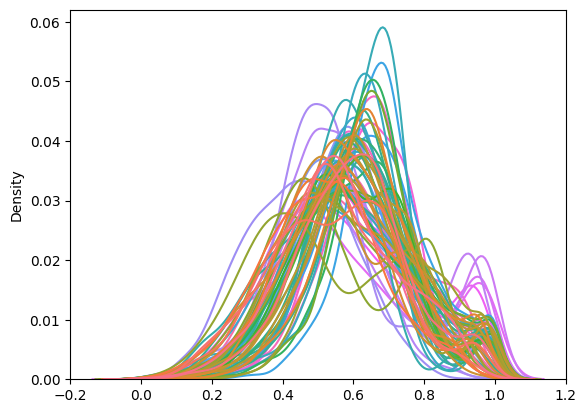

In [24]:
# Minmax 
scaler_minmax = MinMaxScaler().fit(df.drop(["Class"],axis=1))

# transform data
X_train_scaled_minmax = scaler_minmax.transform(df.drop(["Class"],axis=1))

# put them in dataframe 
X_train_scaled_minmax = pd.DataFrame(X_train_scaled_minmax, columns=df.drop(["Class"],axis=1).columns)

# plot
sns.kdeplot(X_train_scaled_minmax,legend=False)
X_train_scaled_minmax.describe()

**Split the Dataset fro Training and Test**

In [25]:
class_encoding= {'Apple':0,
     'Car' :1,
     'Dog' :2,
     'Gold':3,
     'Mobile':4,
     'Rose' :5,
     'Scooter':6,
     'Tiger' :7,
     'Wallet' : 8, 
     'Watch':9
     }

X =  X_train_scaled_minmax
y = original_df["Class"].map(class_encoding)
print("Original class distribution:", Counter(y))

Original class distribution: Counter({8: 271, 0: 266, 6: 265, 5: 263, 1: 261, 2: 261, 7: 261, 3: 259, 4: 259, 9: 259})


**SMOTE technique**

In [26]:

# Target: 1000 samples per class
target_samples = 1000
sampling_strategy = {i: target_samples for i in range(10)}  # 10 classes: 0-9

smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Resampled class distribution:", Counter(y_resampled))



Resampled class distribution: Counter({0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000})


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.40,
    random_state=42,
    stratify=y_resampled
)


In [28]:
model_parameters = {
    'SVM': {
        'model': SVC(),
        'params': {
            "C": [0.5, 1, 1.2, 1.5, 2],
            "kernel": ["poly", "rbf"]
        }
    },
    'Random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 150, 200, 250]
        }
    },
    # 'Logistic_Regression': {
    #     'model': LogisticRegression(multi_class="multinomial", max_iter=1000),
    #     'params': {
    #         "C": [0.1, 0.5, 1, 5, 10],
    #         "solver": ["lbfgs", "saga"]
    #     }
    # },
    # 'Gradient_Boosting': {
    #     'model': GradientBoostingClassifier(),
    #     'params': {
    #         "n_estimators": [50, 100, 200],
    #         "learning_rate": [0.01, 0.1, 0.2],
    #         "max_depth": [3, 5, 7]
    #     }
    # },
    # 'KNN': {
    #     'model': KNeighborsClassifier(),
    #     'params': {
    #         "n_neighbors": [3, 5, 7, 9],
    #         "weights": ["uniform", "distance"]
    #     }
    # },
    # 'Naive_Bayes': {
    #     'model': GaussianNB(),
    #     'params': {}  # no major hyperparameters
    # },
    # 'Neural_Net': {
    #     'model': MLPClassifier(max_iter=1000),
    #     'params': {
    #         "hidden_layer_sizes": [(50,), (100,), (100, 50)],
    #         "activation": ["relu", "tanh"],
    #         "alpha": [0.0001, 0.001, 0.01]
    #     }
    # }
}

In [29]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

In [30]:
scores_list = []
best_model_scores = []

for model_name, model_parameter in model_parameters.items():
    print(f"Trying the model : {model_name}" )
    
    clf = GridSearchCV(
        model_parameter['model'],
        model_parameter['params'],
        cv=5,
        scoring=scoring,
        refit='accuracy',   
        return_train_score=True
    )
    clf.fit(X, y)
    best_model_scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
    # Collect results
    df_temp = pd.DataFrame(clf.cv_results_)
    df_temp["model"] = model_name   # add model column
    scores_list.append(df_temp)



df_all = pd.concat(scores_list, axis=0)

Trying the model : SVM
Trying the model : Random_forest


**Get GridsearchModel out for all Modles**

In [31]:
df_all.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,rank_test_f1_macro,split0_train_f1_macro,split1_train_f1_macro,split2_train_f1_macro,split3_train_f1_macro,split4_train_f1_macro,mean_train_f1_macro,std_train_f1_macro,model,param_n_estimators
0,2.439443,0.310434,0.021209,0.000263,0.5,poly,"{'C': 0.5, 'kernel': 'poly'}",0.017143,0.036190,0.026667,...,5,0.935038,0.887359,0.898023,0.924513,0.885283,0.906043,0.020131,SVM,NaN
1,0.124967,0.001402,0.045386,0.001017,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",0.017143,0.030476,0.017143,...,6,0.344470,0.357423,0.339340,0.370463,0.371323,0.356604,0.013074,SVM,NaN
2,3.382291,0.264841,0.020888,0.000264,1.0,poly,"{'C': 1, 'kernel': 'poly'}",0.017143,0.041905,0.032381,...,1,0.981927,0.964178,0.969037,0.979969,0.956296,0.970282,0.009632,SVM,NaN
3,0.126396,0.001909,0.045430,0.000556,1.0,rbf,"{'C': 1, 'kernel': 'rbf'}",0.017143,0.026667,0.019048,...,8,0.527273,0.501417,0.485051,0.519731,0.507813,0.508257,0.014689,SVM,NaN
4,3.502051,0.329075,0.021086,0.000270,1.2,poly,"{'C': 1.2, 'kernel': 'poly'}",0.013333,0.034286,0.036190,...,2,0.988569,0.976609,0.976671,0.989020,0.969534,0.980081,0.007575,SVM,NaN


**Get the Best Model and Its Parameters**

In [32]:
best_model_df  = pd.DataFrame(best_model_scores)
best_model_df

,model,best_score,best_params
0,SVM,0.025524,"{'C': 1, 'kernel': 'poly'}"
1,Random_forest,0.028190,{'n_estimators': 50}
